<a href="https://colab.research.google.com/github/Shabbaz-Hussein/Decision-tree-models/blob/main/Decision_tree_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Loading dataset
import pandas as pd
maple=pd.read_csv('/content/student_enrollment_data.csv')
print('Shape of the data:', maple.shape)
maple.head(10)

Shape of the data: (20, 8)


,Student_ID,Age,Gender,High_School_Grade,Entrance_Score,Family_Income,Enrollment_Status,Support_Needed
0,1,18,Male,3.5,85,45000,Enrolled,No
1,2,20,Female,2.8,78,32000,Not Enrolled,Yes
2,3,19,Male,3.0,88,38000,Enrolled,No
3,4,21,Female,3.9,91,52000,Enrolled,No
4,5,22,Male,3.4,82,46000,Not Enrolled,Yes
5,6,18,Female,2.9,76,30000,Enrolled,Yes
6,7,19,Male,3.2,83,41000,Not Enrolled,No
7,8,20,Female,3.7,90,49000,Enrolled,No
8,9,21,Male,3.1,80,35000,Enrolled,Yes
9,10,22,Female,2.6,74,33000,Not Enrolled,Yes


In [43]:
#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Predicting Enrollment Status
X_enrollment = maple.drop('Enrollment_Status', axis=1) # Drop the target column
y_enrollment = maple['Enrollment_Status'] # Target column

# Predicting Support Needs
X_support = maple.drop('Support_Needed', axis=1) # Drop the target column
y_support = maple['Support_Needed'] # Target column

encoder = LabelEncoder()
for column in X_enrollment.columns:
    if X_enrollment[column].dtype == 'object':
        X_enrollment[column] = encoder.fit_transform(X_enrollment[column])

for column in X_support.columns:
    if X_support[column].dtype == 'object':
        X_support[column] = encoder.fit_transform(X_support[column])

X_enrollment_train, X_enrollment_test, y_enrollment_train, y_enrollment_test = train_test_split(
    X_enrollment, y_enrollment, test_size=0.2, random_state=42)

X_support_train, X_support_test, y_support_train, y_support_test = train_test_split(
    X_support, y_support, test_size=0.2, random_state=42)

# Creating separate models for enrollment and support predictions
enrollment_model = DecisionTreeClassifier(random_state=42)
support_model = DecisionTreeClassifier(random_state=42)

# Training the models on their respective datasets
enrollment_model.fit(X_enrollment_train, y_enrollment_train)
support_model.fit(X_support_train, y_support_train)

DecisionTreeClassifier(random_state=42)

In [10]:
#Making predictions
y_enrollment_pred = enrollment_model.predict(X_enrollment_test)
y_support_pred = support_model.predict(X_support_test)

print('y_enrollment_pred results;')
print(y_enrollment_pred)
print('y_support_pred results;')
print(y_support_pred)

y_enrollment_pred results;
['Enrolled' 'Enrolled' 'Enrolled' 'Not Enrolled']
y_support_pred results;
['Yes' 'Yes' 'No' 'Yes']


In [11]:
#Calculating accuracy of models
enrollment_accuracy = accuracy_score(y_enrollment_test, y_enrollment_pred)
support_accuracy = accuracy_score(y_support_test, y_support_pred)

print('Enrollment Accuracy:', enrollment_accuracy)
print('Support Accuracy:', support_accuracy)

Enrollment Accuracy: 0.75
Support Accuracy: 0.5


In [12]:
#Evaluating performance of the models
print('Enrollment Classification Report:')
print(classification_report(y_enrollment_test, y_enrollment_pred))
print(confusion_matrix(y_enrollment_test, y_enrollment_pred))

print('Support Classification Report:')
print(classification_report(y_support_test, y_support_pred))
print(confusion_matrix(y_support_test, y_support_pred))

Enrollment Classification Report:
              precision    recall  f1-score   support

    Enrolled       0.67      1.00      0.80         2
Not Enrolled       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

[[2 0]
 [1 1]]
Support Classification Report:
              precision    recall  f1-score   support

          No       0.00      0.00      0.00         1
         Yes       0.67      0.67      0.67         3

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4

[[0 1]
 [1 2]]


[Text(0.6666666666666666, 0.875, 'Entrance_Score <= 83.5\ngini = 0.43\nsamples = 16\nvalue = [11, 5]\nclass = Not Enrolled'),
 Text(0.5, 0.625, 'Entrance_Score <= 81.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = Enrolled'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'High_School_Grade <= 2.8\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Not Enrolled'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Enrolled'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Not Enrolled'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Enrolled'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = Not Enrolled'),
 Text(0.75, 0.75, '  False')]

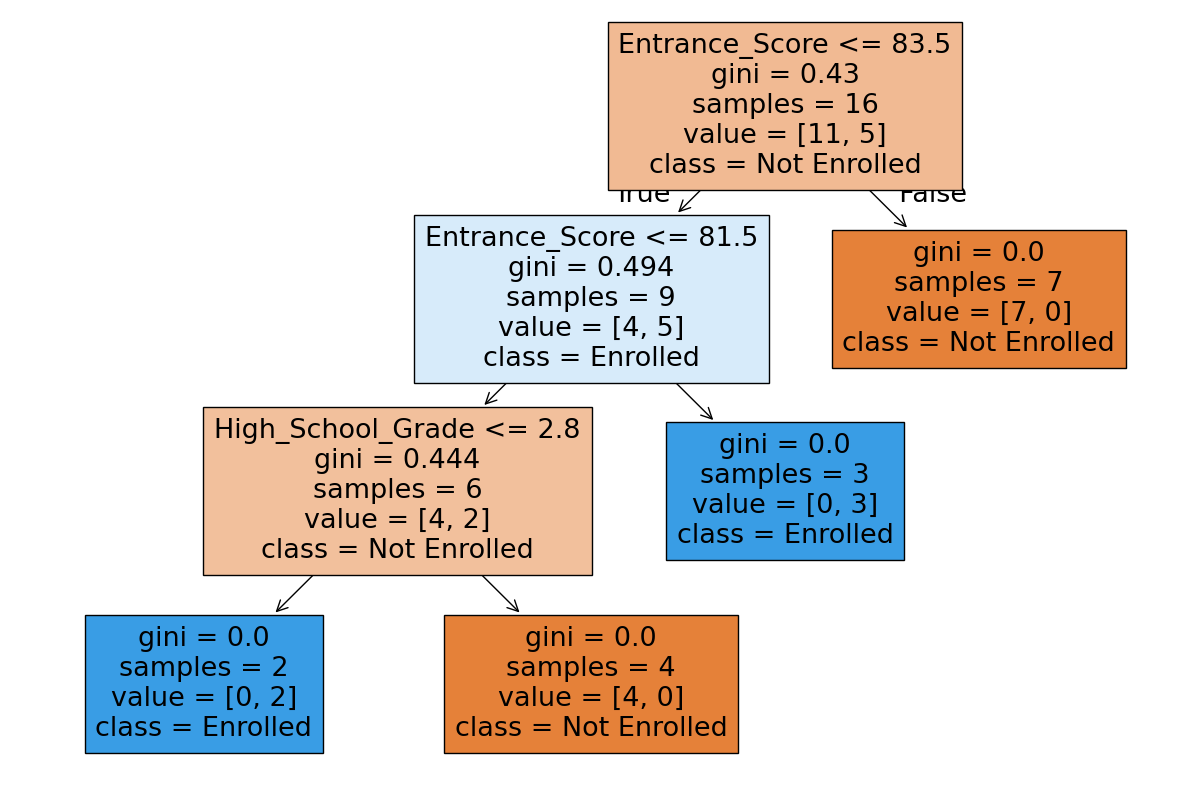

In [13]:
#Vizualization of enrollment decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(enrollment_model, filled=True, feature_names=X_enrollment.columns, class_names=['Not Enrolled', 'Enrolled'])

[Text(0.5, 0.9, 'Family_Income <= 35500.0\ngini = 0.469\nsamples = 16\nvalue = [10, 6]\nclass = No Need'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Need Support'),
 Text(0.41666666666666663, 0.8, 'True  '),
 Text(0.6666666666666666, 0.7, 'Student_ID <= 19.5\ngini = 0.278\nsamples = 12\nvalue = [10, 2]\nclass = No Need'),
 Text(0.5833333333333333, 0.8, '  False'),
 Text(0.5, 0.5, 'Student_ID <= 6.0\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = No Need'),
 Text(0.3333333333333333, 0.3, 'Entrance_Score <= 85.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = No Need'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Need Support'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No Need'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = No Need'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Need Support')]

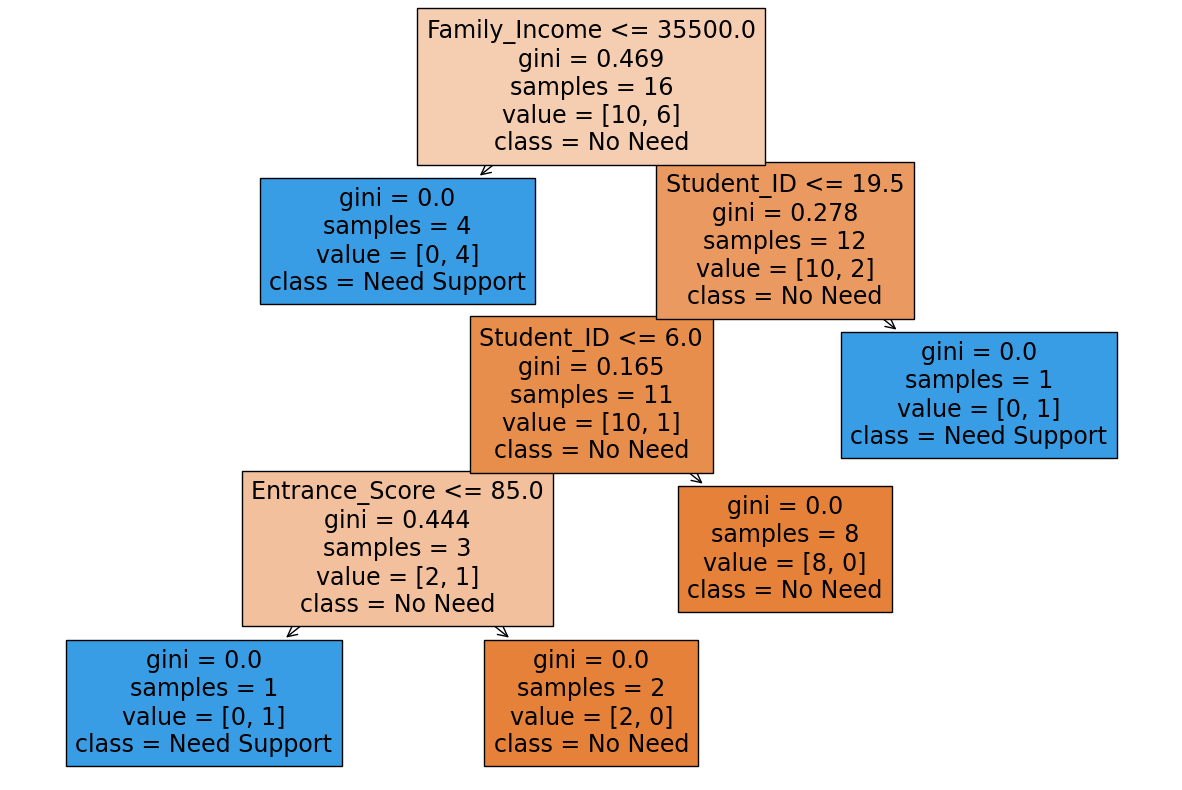

In [14]:
#Vizualization of support decision tree
plt.figure(figsize=(15, 10))
plot_tree(support_model, filled=True, feature_names=X_support.columns, class_names=['No Need', 'Need Support'])

In [15]:
#Saving
import joblib
joblib.dump(enrollment_model, 'enrollment_model.pkl')
joblib.dump(support_model, 'support_model.pkl')

['support_model.pkl']

In [50]:
#Creating new DataFrame with student data
maple2 = pd.DataFrame({
    'Student_ID': range(21, 29),
    'Age': [19, 22, 20, 21, 23, 18, 19, 22],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'High_School_Grade': [3.1, 2.8, 3.6, 3.3, 2.9, 3.7, 3.0, 3.2],
    'Entrance_Score': [82, 75, 89, 83, 78, 90, 85, 80],
    'Family_Income': [41000, 32000, 50000, 39000, 36000, 45000, 34000, 40000],
    'Enrollment_Status': ['Not Enrolled', 'Enrolled', 'Enrolled', 'Not Enrolled', 'Enrolled', 'Enrolled', 'Not Enrolled', 'Enrolled'],
    'Support_Needed': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No']
})

#Mapping Gender to numeric values
Gender_mapping = {'Female': 0, 'Male': 1}
maple2['Gender'] = maple2['Gender'].map(Gender_mapping)

#Encoding Support_Needed (target column) to numeric
Support_mapping = {'Yes': 1, 'No': 0}
maple2['Support_Needed'] = maple2['Support_Needed'].map(Support_mapping)

#Load the saved models for Enrollment and Support prediction
loaded_enrollment_model = joblib.load('enrollment_model.pkl')
loaded_support_model = joblib.load('support_model.pkl')

X_enrollment_pred = maple2[['Student_ID','Age', 'Gender', 'High_School_Grade', 'Entrance_Score', 'Family_Income', 'Support_Needed']]

#Predictions
pred1 = loaded_enrollment_model.predict(X_enrollment_pred)

Enrollment_mapping = {'Not Enrolled': 0, 'Enrolled': 1}
maple2['Enrollment_Status'] = maple2['Enrollment_Status'].map(Enrollment_mapping)

X_support_pred = maple2[['Student_ID','Age', 'Gender', 'High_School_Grade', 'Entrance_Score', 'Family_Income', 'Enrollment_Status']]

#Predictions
pred2 = loaded_support_model.predict(X_support_pred)

#Adding predictions to maple2
maple2['Predicted_Enrollment_Status'] = pred1
maple2['Predicted_Support_Needed'] = pred2

print(maple2[['Student_ID', 'Predicted_Enrollment_Status', 'Predicted_Support_Needed']])

   Student_ID Predicted_Enrollment_Status Predicted_Support_Needed
0          21                Not Enrolled                      Yes
1          22                Not Enrolled                      Yes
2          23                    Enrolled                      Yes
3          24                Not Enrolled                      Yes
4          25                    Enrolled                      Yes
5          26                    Enrolled                      Yes
6          27                    Enrolled                      Yes
7          28                    Enrolled                      Yes
